# Las librerías _matplotlib_ y _plotly_

Para el conjunto de datos de apps de Google Play 'googleplaystore.csv':

- Realizar un gráfico histograma de la variable "Rating" de las apps
- Realizar un diagrama de barras de la variable "Category" de las apps
- Realizar un gráfico de dispersión de "Rating" vs "Reviews"
- (OPCIONAL) Realizar otro gráfico de los vistos anteriormente utilizando otras variables del dataset.

## Realizar un gráfico histograma de la variable "Rating" de las apps

In [28]:
import pandas as pd

dataset = pd.read_csv('../../data/googleplaystore.csv')

dataset.drop(dataset[dataset.Category == '1.9'].index, inplace=True)

display(dataset.Category.value_counts())

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64

In [3]:
print(f'Rating minimo: {dataset.Rating.min()}')
print(f'Rating maximo: {dataset.Rating.max()}')

Rating minimo: 1.0
Rating maximo: 19.0


Text(0, 0.5, 'Frecuencia')

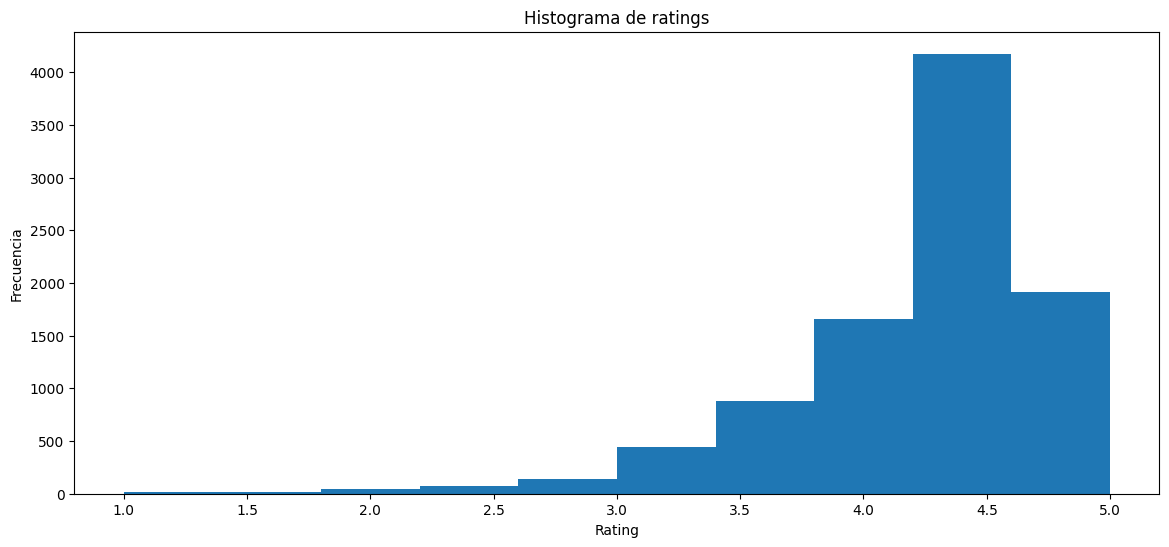

In [29]:
import matplotlib.pyplot as plt

dataset.Rating.plot(
    kind='hist',
    figsize=(14, 6),
    title='Histograma de ratings'
)

# Decoracion del histograma
plt.title('Histograma de ratings')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')

## Realizar un diagrama de barras de la variable "Category" de las apps

Text(0, 0.5, 'Categoria')

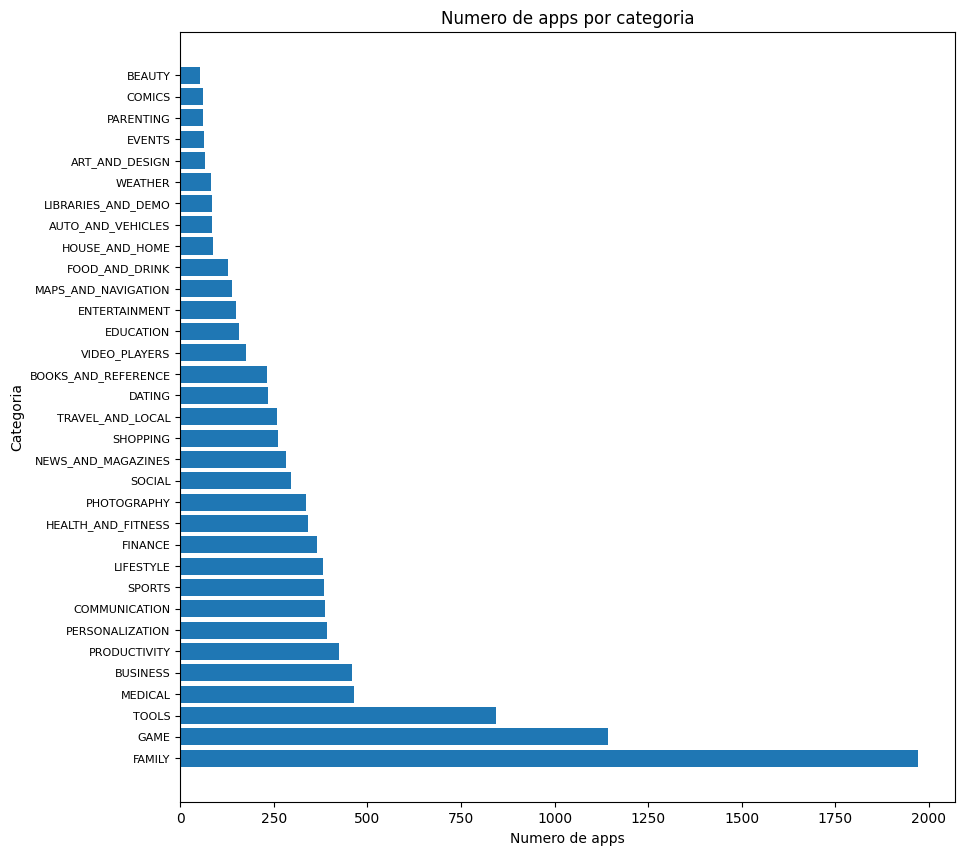

In [30]:
# Creacion de la figura
# * Debe ser barh en vez de bar para permitir que se lean las categorias
fig, ax = plt.subplots()

fig.set_size_inches(10, 10)

plt.barh(
    dataset['Category'].value_counts().keys(),
    dataset['Category'].value_counts().values,
)

# Decoracion de la figura
plt.title('Numero de apps por categoria')
plt.yticks(size = 8)
plt.xlabel('Numero de apps')
plt.ylabel('Categoria')

## Realizar un gráfico de dispersión de "Rating" vs "Reviews"

<Axes: xlabel='Rating', ylabel='Reviews'>

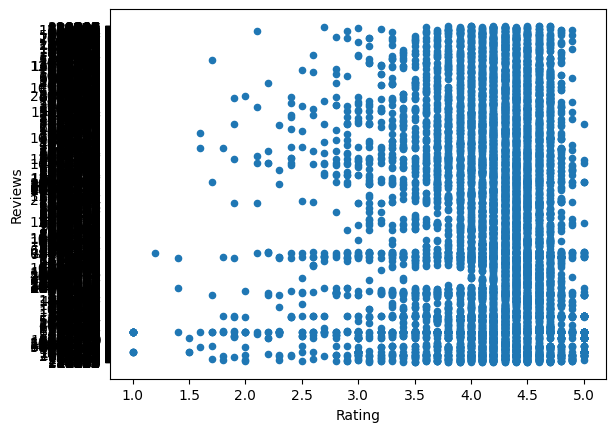

In [31]:
# Obtener los valores de las columnas
dataset.plot(
    kind = 'scatter',
    x = 'Rating',
    y = 'Reviews'
)

## Realizar otro gráfico de los vistos anteriormente utilizando otras variables del dataset.

[]

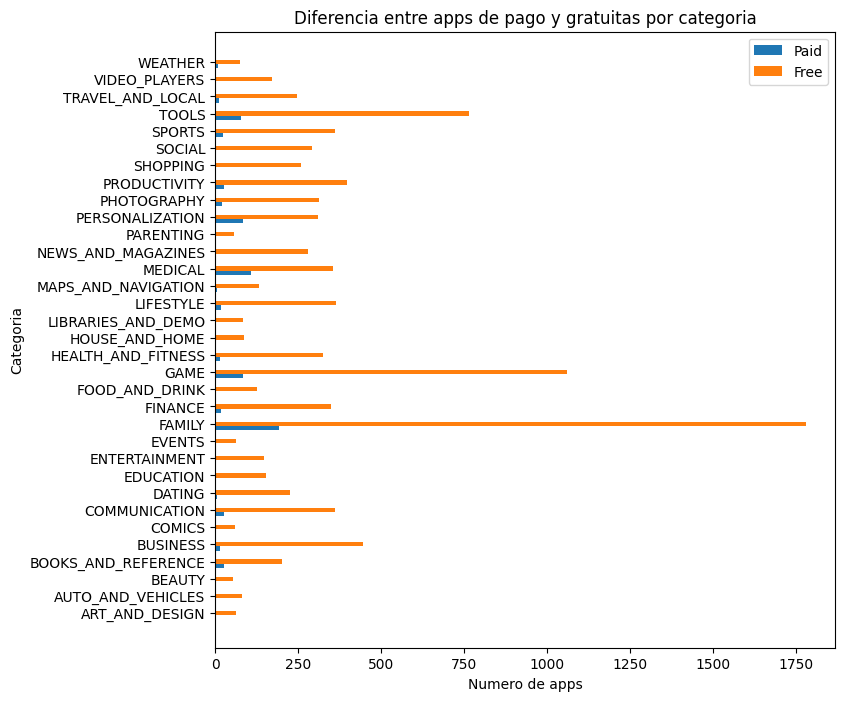

In [50]:
import numpy as np


# Si estás mirando para reducir el código, estoy 100% seguro de que se puede hacer en menos de la mitad
# pero no le tengo respeto al lenguaje, así que así se queda
CHART_SIZE = 8

df = dataset.pivot_table(index='Category', columns='Type', values='App', aggfunc='count')
df.columns = ['Free apps', 'Paid apps']
df.fillna(0, inplace=True)
df.head(10)

fig, ax = plt.subplots()

# Size of the chart
fig.set_size_inches(CHART_SIZE, CHART_SIZE)

x = np.arange(df.shape[0])
width = 0.25

# Barras de pago
rects = ax.barh(
    x,
    df['Paid apps'],
    width,
    label = 'Paid'
)

# Barras gratuitas
rects = ax.barh(
    x + width,
    df['Free apps'],
    width,
    label = 'Free',
)

# Decoracion de la figura
ax.set_title('Diferencia entre apps de pago y gratuitas por categoria')
ax.set_xlabel('Numero de apps')
ax.set_ylabel('Categoria')
ax.legend()
ax.set_yticks(x + width, df.index)

plt.plot()

c:\Users\cabre\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cabre\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cabre\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cabre\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

[]

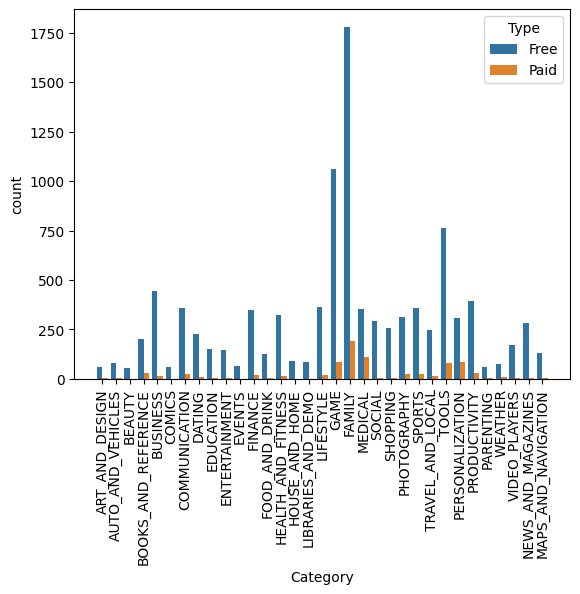

In [59]:
import seaborn as sns

# Ese puto 'hue' lo echo en falta en el matplotlib

sns.countplot(
    data = dataset,
    x = 'Category',
    hue = 'Type'
)
plt.xticks(rotation = 90)
plt.plot()